In [1]:
import cv2
import numpy as np
from PIL import Image

import importlib

import py_vncorenlp
import torch
from transformers import AutoModel, AutoTokenizer

import preprocess_img
import LineOCR
importlib.reload(LineOCR)

import pandas as pd

import graph
from torch_geometric.utils.convert import from_networkx
import torch_geometric
importlib.reload(graph)

import torch.nn as nn
from torch_geometric.nn import ChebConv, GCNConv
import torch.nn.functional as F

import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu").type


ID2LABEL_DICT = {
    0: "None",
    1: "sign_date",
    2: "diagnose",
    3:"hospital_name",
    4:"address",
    5:"age",
    6:"treatment",
    7:"patient_name",
    8:"admission_date",
    9:"discharge_date",
    10:"gender",
    11:"document_type",
    12:"department",
    13:"note",
    14:"BHYT",
}

INFO 2022-10-19 17:38:28,334 utils.py:147] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
#Load Text Segmentation engine
# rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=r'D:\PPYCode\OCR\ppy_paddle\weights\nlp\vncorenlp')
# phobert = AutoModel.from_pretrained("vinai/phobert-base")
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
# %cd ../../../

In [3]:
#Load all models
preprocessImage = preprocess_img.PreprocessImage()
lineDetAndOCR = LineOCR.ProcessImage()

In [4]:
test_img = cv2.imread(r"imgs_test\705.jpeg")
test_img = preprocessImage(test_img)
# lines, t = lineDetInfer.line_det_infer(test_img)

In [5]:
# image = test_img.copy()
# for line in lines:
#     pts = line.astype(int)
#     pts = pts.reshape((-1, 1, 2))
    
#     isClosed = True
    
#     # Blue color in BGR
#     color = (255, 0, 0)
    
#     # Line thickness of 2 px
#     thickness = 2
    
#     image = cv2.polylines(image, [pts],
#                         isClosed, color, thickness)

# display(Image.fromarray(image))

In [6]:
result = lineDetAndOCR.begin_recognize_text(test_img)

35


In [7]:
import kie_gcn
from kie_gcn import InvoiceGCN
kieGCN = kie_gcn.KieGCN()

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


d:\PPYCode\OCR\ppy_paddle


In [8]:
kie_df = kieGCN(result, test_img)

In [11]:
kie_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score
0,0,128,43,343,69,BỆNH VIỆN QUÂN Y 211,hospital_name,0.965612
1,1,159,66,294,84,Khoa T-M-H (B9),department,0.989540
2,2,343,46,702,67,CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM,None,0.999201
3,3,423,66,638,86,Độc lập - Tự do - Hạnh phúc,None,0.999880
4,4,749,46,850,64,MS: 01/BV-01,None,0.997714
5,5,750,65,905,85,Số bệnh án: 22.006530,None,0.978973
6,6,751,85,943,105,Mã y tế: BV_211.22011209,None,0.589870
7,7,76,134,225,155,- Họ tên người bệnh:,None,0.995059
8,8,263,135,487,155,NGUYỄN THỊ THU HƯỜNG,patient_name,0.995732
9,9,439,109,611,136,GIẤY RA VIỆN,document_type,0.996945


In [ ]:
# for iter in range(len(result["croped_pil_img"])):
#     line_img = result["croped_pil_img"][iter]
#     text = result["text"][iter]
#     ocr_score = result["ocr_score"][iter]
#     display(line_img)
#     print(f"{text} \t {ocr_score}")
#     print("---------------------------------")

In [8]:
list_xmin = []
list_ymin = []
list_xmax = []
list_ymax = []
list_Object = []

for iter in range(len(result["bbox"])):
    xmin, ymin, xmax, ymax = result["bbox"][iter]
    text = result["text"][iter]
    list_xmin.append(xmin)
    list_xmax.append(xmax)
    list_ymin.append(ymin)
    list_ymax.append(ymax)
    list_Object.append(text)
single_df = {
    "xmin": list_xmin,
    "xmax": list_xmax,
    "ymin": list_ymin,
    "ymax": list_ymax,
    "Object": list_Object,
    "labels": ["None"]*len(list_Object)
}

In [9]:
single_df = pd.DataFrame.from_dict(single_df)

In [10]:
single_df.to_excel("temp_data/temp_gcn/csv/temp.xlsx")
cv2.imwrite("temp_data/temp_gcn/img/temp.jpg", test_img)

True

In [12]:
def get_sentence_features(sentence):
    segmented_sentence = rdrsegmenter.word_segment(sentence)
    tokenized_sentence = torch.tensor([tokenizer.encode(segmented_sentence[0])])
    features = []
    with torch.no_grad():
        features = phobert(tokenized_sentence)
    return features

def make_sent_bert_features(text):
    features = get_sentence_features(text)
    return features[1][0].cpu().numpy()

In [ ]:
file = 'temp'
connect = graph.Grapher(file)
G,result, df = connect.graph_formation(export_graph=False)
df = connect.relative_distance(export_document_graph = False)
individual_data = from_networkx(G)

In [25]:
feature_cols = [
            "rd_b",
            "rd_r",
            "rd_t",
            "rd_l",
            "line_number",
            "n_upper",
            "n_alpha",
            "n_spaces",
            "n_numeric",
            "n_special",
        ]

In [26]:
def preprocess_inference_data(df, individual_data):
        text_features = []
        for _, row in df.iterrows():
            text_features.append(make_sent_bert_features(row["Object"]))
        text_features = np.asarray(text_features, dtype=np.float32)

        numeric_features = df[feature_cols].values.astype(np.float32)

        features = np.concatenate((numeric_features, text_features), axis=1)
        features = torch.tensor(features)

        for col in df.columns:
            try:
                df[col] = df[col].str.strip()
            except AttributeError as e:
                pass
        text = df["Object"].values
        individual_data.x = features

        individual_data.text = text

        test_list_of_graphs = []
        test_list_of_graphs.append(individual_data)

        test_one_data = ""
        test_one_data = torch_geometric.data.Batch.from_data_list(test_list_of_graphs)
        test_one_data.edge_attr = None
        return test_one_data

In [27]:

test_data = preprocess_inference_data(df, individual_data)
test_data.to(device)

DataBatch(edge_index=[2, 90], num_nodes=35, x=[35, 778], text=[1], batch=[35], ptr=[2])

In [81]:
class InvoiceGCN(nn.Module):
    def __init__(self, input_dim, chebnet=False, n_classes=5, dropout_rate=0.2, K=3):
        super().__init__()

        self.input_dim = input_dim
        self.n_classes = n_classes
        self.dropout_rate = dropout_rate

        if chebnet:
            self.conv1 = ChebConv(self.input_dim, 64, K=K)
            # self.conv2 = ChebConv(64, 32, K=K)
            self.conv3 = ChebConv(64, 64, K=K)
            self.conv4 = ChebConv(64, self.n_classes, K=K)
        else:
            self.conv1 = GCNConv(self.first_dim, 64, improved=True, cached=True)
            self.conv2 = GCNConv(64, 32, improved=True, cached=True)
            self.conv3 = GCNConv(32, 16, improved=True, cached=True)
            self.conv4 = GCNConv(16, self.n_classes, improved=True, cached=True)

    def forward(self, data):
        # for transductive setting with full-batch update
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr

        x = F.dropout(F.relu(self.conv1(x, edge_index, edge_weight)), p=self.dropout_rate, training=self.training)
        # x = F.dropout(F.relu(self.conv2(x, edge_index, edge_weight)), p=self.dropout_rate, training=self.training)
        x = F.dropout(F.relu(self.conv3(x, edge_index, edge_weight)), p=self.dropout_rate, training=self.training)
        x = self.conv4(x, edge_index, edge_weight)

        return F.log_softmax(x, dim=1)

In [82]:
model = torch.load(r"D:\PPYCode\OCR\ppy_paddle\weights\gcn\GCN_221017.pth")
model.to(device)

InvoiceGCN(
  (conv1): ChebConv(778, 64, K=3, normalization=sym)
  (conv3): ChebConv(64, 64, K=3, normalization=sym)
  (conv4): ChebConv(64, 15, K=3, normalization=sym)
)

In [84]:
y_preds= model(test_data)
max_idx_Y_pred= y_preds.max(dim=1)[1].cpu().numpy()
shorten_pred = [y_preds[idx][max_idx_Y_pred[idx]] for idx in range(len(max_idx_Y_pred))]
pred_probs = torch.exp(torch.tensor(shorten_pred))


In [86]:
lb = [ID2LABEL_DICT[each] for each in list(max_idx_Y_pred)]

In [87]:
df["pred_class"] = lb
df["confidence_score"] = pred_probs

In [88]:
new_df = df[["index", "xmin", "ymin", "xmax", "ymax", "Object", "pred_class", "confidence_score"]]

In [10]:
new_df["confidence_score"]

NameError: name 'new_df' is not defined

In [31]:
for idx, each in enumerate(y_preds):
    text = test_data.text[0][idx]
    pred_class = ID2LABEL_DICT[each]
    print(text + '\t' + pred_class)
    print("-----------------")


BỆNH VIỆN QUÂN Y 211	hospital_name
-----------------
Khoa T-M-H (B9)	department
-----------------
CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM	None
-----------------
Độc lập - Tự do - Hạnh phúc	None
-----------------
MS: 01/BV-01	None
-----------------
Số bệnh án: 22.006530	None
-----------------
Mã y tế: BV_211.22011209	None
-----------------
- Họ tên người bệnh:	None
-----------------
NGUYỄN THỊ THU HƯỜNG	patient_name
-----------------
GIẤY RA VIỆN	document_type
-----------------
Năm sinh: 2009	age
-----------------
Giới tính: Nữ	gender
-----------------
- Dân tộc : Kinh	None
-----------------
Nghề nghiệp: Sinh viên, học sinh	gender
-----------------
- Thẻ BHYT số: HS464642190886964002	BHYT
-----------------
giá trị từ:	None
-----------------
1/1/2022	None
-----------------
đến 31/12/2022	address
-----------------
- Vào viện lúc:	None
-----------------
Địa chỉ: Thôn Ia Lôk, Xã Ia Mơ Nông, Huyện Chư Păh, Tỉnh Gia Lai	address
-----------------
09	diagnose
-----------------
giờ 54 phút, ngày 11 t

# End2End inference

In [1]:
import cv2
import preprocess_img
import LineOCR
import pandas as pd
import numpy as np
import kie_gcn
from kie_gcn import InvoiceGCN
import time
import dateutil.parser as dparser
import unidecode
import datefinder
import re
import ast
import json

INFO 2022-10-27 14:58:26,431 utils.py:147] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
preprocessImage = preprocess_img.PreprocessImage()
lineDetAndOCR = LineOCR.ProcessImage(detection_model_path="./PaddleOCR/pretrained_models/exported_det_model_221025", text_recognition_model_path="./weights/ocr/ocr_221025.pth")
kieGCN = kie_gcn.KieGCN(gcn_model_path="./weights/gcn/GCN_221026.pth")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
def get_raw_predicted(label:str, predicted_df:pd.DataFrame, sort_top_down = False) -> list: 
    extracted_row = predicted_df[predicted_df["pred_label"]==label]
    if sort_top_down == True:
        extracted_row = extracted_row.sort_values("ymax", ascending=True)
    else:
        extracted_row = extracted_row.sort_values("confidence_score", ascending=False)
    extracted_row = extracted_row["Object"].to_list()
    extracted_row = [each.strip() for each in extracted_row]
    return extracted_row

In [48]:
PATIENT_NAME_REMOVE_LIST=[
    "Họ và tên người bệnh",
    "họ và tên người bệnh",
    "Họ và tên",
    "họ và tên",
    "Họ tên",
    "họ tên",
]

def patient_name_regularization(raw_patient_name):
    shorten_patient_name = raw_patient_name
    count_spliter = raw_patient_name.count(":")
    if count_spliter>0:
        shorten_patient_name = raw_patient_name.split(":")[-1]
    for each in PATIENT_NAME_REMOVE_LIST:
        shorten_patient_name = shorten_patient_name.replace(each, "")
    return shorten_patient_name

In [49]:
def parse_date_with_re(raw_date):
    pattern = "\d+[/-]\d+[/-]\d+"
    temp_date = raw_date.replace("\\","/")
    temp_date = raw_date.replace(" ","")
    temp_date = re.findall(pattern=pattern, string=temp_date)
    list_result = []
    for each in temp_date:
        for splitter in ["/", "-"]:
            if splitter in each:
                d, m, y = each.split(splitter)
                list_result.append((d,m,y))
                break
    return list_result

def vn_date_parser(date_raw_text):
    unaccented_string = unidecode.unidecode(date_raw_text).lower()
    day_idx = -1
    day_val = -1
    month_idx = -1
    month_val = -1
    year_idx = -1 
    year_val = -1
    
    list_dates = parse_date_with_re(unaccented_string)
    if len(list_dates) ==0:
        unaccented_string = re.sub('(\d+(\.\d+)?)', r'\1 ', unaccented_string) #append space between mixed digit and charactor
        unaccented_string = re.sub(' +', ' ', unaccented_string)
        elms = unaccented_string.split(" ")
        max_idx = len(elms) -1
        
        #Parse Day
        try:
            day_idx = elms.index("ngay") + 1
            temp_day_val = int(elms[day_idx])
            if temp_day_val in range(1,32):
                day_val = temp_day_val
        except Exception as e:
            # print(e)
            # print("***cannot parse DAY***")
            pass

        #Parse Month
        try:
            month_idx = elms.index("thang") + 1
            temp_month_val = int(elms[month_idx])
            if temp_month_val in range(1,13):
                month_val = temp_month_val
        except Exception as e:
            # print(e)
            # print("***cannot parse Month***")
            pass

        
        #Parse Year
        try:
            year_idx = elms.index("nam") + 1
            temp_year_val = int(elms[year_idx])
            if temp_year_val in range(1900,2100):
                year_val = temp_year_val
        except Exception as e:
            # print(e)
            # print("***cannot parse Year***")
            pass
    else:
        day_val, month_val, year_val = list_dates[0]
    return day_val, month_val, year_val
    

In [50]:

AGE_ANCHOR_LIST = [
    "Tuổi",
    "tuổi",
    "Năm sinh",
    "năm sinh",
    "Ngày sinh",
    "ngày sinh",
    "Sinh ngày",
    "sinh ngày"
]

GENDER_ANCHOR_LIST = [
    "Giới tính",
    "giới tính",
    "Giới",
    "giới",
    "Nam/Nữ",
    "Nam/nữ",
    "nam/nữ",
    "Nam/ Nữ",
    "Nam/ nữ",
    "nam/ nữ",
]

def check_mixed_age_gender(raw_text):
    age = None
    gender = None
    count_spliter = raw_text.count(":")
    is_mixed_age_gender = False
    if count_spliter>1:
        is_mixed_age_gender = True
    temp_age_elm = False
    temp_gender_elm = False
    for each in AGE_ANCHOR_LIST:
        if each in raw_text:
            temp_age_elm = True
            break
    for each in GENDER_ANCHOR_LIST:
        if each in raw_text:
            temp_gender_elm = True
            break
    if temp_age_elm + temp_gender_elm ==2:
        is_mixed_age_gender = True

    if is_mixed_age_gender:
        #Mixed age and gender check
        print("**mixed age and gender**")
        parts = raw_text.split(":")
        list_number = re.findall(r'\d+', raw_text)
        if len(list_number)==1:
            age = list_number[0]
            unit_flag = sum([True if each in parts[1].lower() else False for each in ["th", "tháng"]])
            if unit_flag != 0:
                age = int(age)/12
        
        words = raw_text.split(" ")
        if words[-1].lower().strip() == "nam":
            gender = "Nam"
        elif words[-1].lower().strip() == "nữ":
            gender = "Nữ"
        
        
        if len(list_number) > 1:
            # print("Check birthday")
            try:
                # birthday = dparser.parse(raw_text,fuzzy=True, dayfirst = True)
                d,m,y = vn_date_parser(raw_text)
                age = f"{d}/{m}/{y}"
            except:
                print("***cannot parse date from:", raw_text)
            #Check birthday
            pass
    return age, gender


def age_regularization(raw_age):
    age = ""
    gender = None
    count_spliter = raw_age.count(":")

    temp_age, temp_gender = check_mixed_age_gender(raw_age)
    if temp_age != None:
        age = temp_age
    if temp_gender != None:
        gender = temp_gender

    elif count_spliter == 1:
        left_part, right_part = raw_age.split(":")
        left_part = left_part.strip()
        right_part = right_part.strip()
        for age_anchor in AGE_ANCHOR_LIST:
            if age_anchor in left_part:
                list_number = re.findall(r'\d+', right_part)
                if len(list_number)==1:
                    age = list_number[0]
                    unit_flag = sum([True if each in right_part.lower() else False for each in ["th", "tháng"]])
                    if unit_flag != 0:
                        age = int(age)/12
                elif len(list_number) > 1:
                    # print("Check birthday")
                    try:
                        d,m,y = vn_date_parser(raw_age)
                        age = f"{d}/{m}/{y}"
                    except:
                        print("***cannot parse date from:", raw_age)
                    #Check birthday
                break

    elif count_spliter == 0:
        list_number = re.findall(r'\d+', raw_age)
        if len(list_number) ==1:
            age = list_number[0]
            unit_flag = sum([True if each in raw_age.lower() else False for each in ["th", "tháng"]])
            if unit_flag != 0:
                age = int(age)/12
        elif len(list_number) >1:
            #Check birthday
            # print("Check birthday")
            try:
                birthday = dparser.parse(raw_age,fuzzy=True, dayfirst = True)
                age = birthday.strftime("%d/%m/%Y")
            except:
                print("***cannot parse date from:", raw_age)
    return age, gender

def gender_regularization(raw_gender):
    age = None
    gender = ""
    count_spliter = raw_gender.count(":")

    temp_age, temp_gender = check_mixed_age_gender(raw_gender)
    if temp_age != None:
        age = temp_age
    if temp_gender != None:
        gender = temp_gender
    
    elif count_spliter == 1:
        left_part, right_part = raw_gender.split(":")
        left_part = left_part.strip()
        right_part = right_part.strip()
        for each in GENDER_ANCHOR_LIST:
            if each in left_part.lower():
                if right_part.lower() == "nam":
                    gender = "Nam"
                elif right_part.lower() == "nữ":
                    gender = "Nữ"
                break

    elif count_spliter == 0:
        shorten_gender = raw_gender
        for each in GENDER_ANCHOR_LIST:
            shorten_gender = raw_gender.replace(each, "")
        shorten_gender = shorten_gender.strip()
        if shorten_gender.lower() == "nam":
            gender = "Nam"
        elif shorten_gender.lower() == "nữ":
            gender = "Nữ"

    return gender, age

In [51]:
def icd_code_parser(raw_diagnose):
    diagnose = " " + raw_diagnose + " "
    diagnose = diagnose.replace("ICD10", "ICD")
    diagnose = diagnose.replace("icd10", "icd")
    first_pattern = '[,:\- \[({;][a-zA-Z]{1}\d+.\d+[,:\- \])};]'
    second_pattern = '[,:\- \[({;][a-zA-Z]{1}\d+[,:\- \])};]'
    first_result = re.findall(first_pattern, diagnose)
    second_result = re.findall(second_pattern, diagnose)

    total_result = first_result + second_result
    final_result = []
    for each in total_result:
        end_chars_to_remove = ",.:])}- ;"
        start_chars_to_remove = ",.:[({- ;"
        single_icd = each
        if single_icd[-1] in end_chars_to_remove:
            single_icd = single_icd[:-1]
        if single_icd[0] in start_chars_to_remove:
            single_icd = single_icd[1:]
        final_result.append(single_icd)
    return final_result

In [53]:
def icd_code_parser(raw_diagnose):
    diagnose = " " + raw_diagnose + " "
    diagnose = diagnose.replace("ICD10", "ICD")
    diagnose = diagnose.replace("icd10", "icd")
    first_pattern = '(?=([,:\- \[({;/]([a-zA-Z]{1}\d+.\d+)[.,:\- \])};/]))'
    second_pattern = '(?=([,:\- \[({;/]([a-zA-Z]{1}\d+)[.,:\- \])};/]))'
    first_result = re.findall(first_pattern, diagnose)
    second_result = re.findall(second_pattern, diagnose)

    first_result_unique  = [each[1] for each in first_result]
    second_result_unique  = [each[1] for each in second_result]

    first_result_idx = [raw_diagnose.index(each) for each in first_result_unique]
    second_result_idx = [raw_diagnose.index(each) for each in second_result_unique]

    unique_icds = first_result_unique.copy()
    for each_idx, val in zip(second_result_idx, second_result_unique):
        if each_idx not in first_result_idx:
            unique_icds.append(val)
    return unique_icds

In [7]:
import re

In [49]:
raw_diagnose = "Mã icd10 là:R50.1 R50.2;R50.13/G24"

diagnose = " " + raw_diagnose + " "
diagnose = diagnose.replace("ICD10", "ICD")
diagnose = diagnose.replace("icd10", "icd")
first_pattern = '(?=([,:\- \[({;/]([a-zA-Z]{1}\d+.\d+)[.,:\- \])};/]))'
second_pattern = '(?=([,:\- \[({;/]([a-zA-Z]{1}\d+)[.,:\- \])};/]))'
first_result = re.findall(first_pattern, diagnose)
second_result = re.findall(second_pattern, diagnose)

first_result_unique  = [each[1] for each in first_result]
second_result_unique  = [each[1] for each in second_result]

first_result_idx = [raw_diagnose.index(each) for each in first_result_unique]
second_result_idx = [raw_diagnose.index(each) for each in second_result_unique]

unique_icds = first_result_unique.copy()
for each_idx, val in zip(second_result_idx, second_result_unique):
    if each_idx not in first_result_idx:
        unique_icds.append(val)


In [50]:
first_result

[(':R50.1 ', 'R50.1'), (' R50.2;', 'R50.2'), (';R50.13/', 'R50.13')]

In [51]:
second_result

[(':R50.', 'R50'), (' R50.', 'R50'), (';R50.', 'R50'), ('/G24 ', 'G24')]

In [52]:
unique_icds

['R50.1', 'R50.2', 'R50.13', 'G24']

In [52]:
1 not in range(0,100)

False

In [53]:
def visualize_main_info(kie_df):
    #HOSPITAL NAME
    extracted_hospital_name =  get_raw_predicted("hospital_name", kie_df, sort_top_down=True)
    merged_hospital_name = " ".join(extracted_hospital_name)
    print("hospital_name:", merged_hospital_name)
    # if len(extracted_hospital_name)>0:
    #     print("hospital_name:", extracted_hospital_name[0])
        
    #PATIENT NAME
    extracted_patient_names =  get_raw_predicted("patient_name", kie_df)
    if len(extracted_patient_names)>0:

        patient_name = patient_name_regularization(extracted_patient_names[0])
        print("patient_name:", patient_name)

    #AGE
    extracted_ages =  get_raw_predicted("age", kie_df)
    if len(extracted_ages)>0:
        age, temp_gender = age_regularization(extracted_ages[0])
        print("age:", age)
        if temp_gender!= None:
            print("gender:", temp_gender)

    #GENDER
    extracted_gender =  get_raw_predicted("gender", kie_df)
    if len(extracted_gender)>0:
        gender, temp_age = gender_regularization(extracted_gender[0])
        print("gender:", gender)
        if temp_age!= None:
            print("age:", temp_age)

    #ADMISION DATE
    extracted_admission_date =  get_raw_predicted("admission_date", kie_df)
    if len(extracted_admission_date)>0:
        for each in extracted_admission_date:
            d,m,y = vn_date_parser(each)
            admission_date = (d,m,y)
            vis_date = f"{d}/{m}/{y}"
            print("admission_date:", vis_date)

    #DISCHARGE DATE
    extracted_discharge_date =  get_raw_predicted("discharge_date", kie_df)
    if len(extracted_discharge_date)>0:
        for each in extracted_discharge_date:
            d,m,y = vn_date_parser(each)
            discharge_date = (d,m,y)
            vis_date = f"{d}/{m}/{y}"
            print("discharge_date:", vis_date)

    #SIGN DATE
    extracted_sign_date =  get_raw_predicted("sign_date", kie_df)
    if len(extracted_sign_date)>0:
        for each in extracted_sign_date:
            d,m,y = vn_date_parser(each)
            sign_date = (d,m,y)
            vis_date = f"{d}/{m}/{y}"
            print("sign_date:", vis_date)

    #ICD CODE
    extracted_ICD_code = get_raw_predicted("diagnose", kie_df)
    unique_icd_codes = []
    if len(extracted_ICD_code)>0:
        for each in extracted_ICD_code:
            icd_code = icd_code_parser(each)
            if icd_code not in unique_icd_codes:
                unique_icd_codes += icd_code
    remain_field =  get_raw_predicted("None", kie_df) + get_raw_predicted("treatment", kie_df) + get_raw_predicted("note", kie_df)
    for each in remain_field:
        if "icd" in each.lower():
            icd_code = icd_code_parser(each)
            if icd_code not in unique_icd_codes:
                unique_icd_codes += icd_code
    print("ICD code:", unique_icd_codes)

In [6]:
s_time = time.time()
img_idx = "497"
test_img = cv2.imread(f"D:/PPYData/rotated_imgs/{img_idx}.jpeg")
test_img = preprocessImage(test_img)

result = lineDetAndOCR.begin_recognize_text(test_img)
kie_df = kieGCN(result, test_img)
print("Total processing time:", time.time() - s_time)
print("--------------------")


extracted_line time: 0.20294833183288574
ocr_line time: 0.8591618537902832
make graph:  0.17600631713867188
transform:  1.784822940826416
Total processing time: 3.9613447189331055
--------------------


In [6]:
# img_idx = "985"
import json
Docbase_path = "D:/PPYData/DPJson/"
fp = Docbase_path+f"{img_idx}.jpeg.json"
js_path = json.load(open(fp, encoding="utf-8"))

temp_list_db_icd = js_path["data"][0]["info"]["icd_10"]
db_icd = []
for each in temp_list_db_icd:
    db_icd.append(each[0])

db_hospital_name = js_path["data"][0]["info"]["medical_facility"]
db_gender = js_path["data"][0]["info"]["gender"]
db_discharge_date = js_path["data"][0]["info"]["hospital_discharge_date"]
db_admisstion_date = js_path["data"][0]["info"]["hospitalization_date"]
db_patient_name = js_path["data"][0]["info"]["patient_name"]
db_age = js_path["data"][0]["info"]["year_of_birth"]

print("hospital_name:", db_hospital_name)
print("patient_name:", db_patient_name)
print("age:", db_age)
print("gender:", db_gender)
print("admisstion_date:", db_admisstion_date)
print("discharge_date:", db_discharge_date)
print("ICD code:", db_icd)


hospital_name: BỆNH VIỆN QUÂN Y 15
patient_name: VÕ THỊ SA
age: 06/01/1989
gender: Nữ
admisstion_date: 05/10/2021
discharge_date: 16/10/2021
ICD code: ['U62.292', 'U55.621', 'U59.421', 'U62.392', 'U59.4', 'U57.011']


hospital_name: BỆNH VIỆN QUÂN Y 15
patient_name:  PHẠM THỊ NGỌC DIỄM
**mixed age and gender**
age: 21/10/2019
gender: Nữ
admission_date: 14/8/2022
admission_date: 19/8/2022
sign_date: 19/8/2022
sign_date: 19/8/2022
ICD code: ['A91']


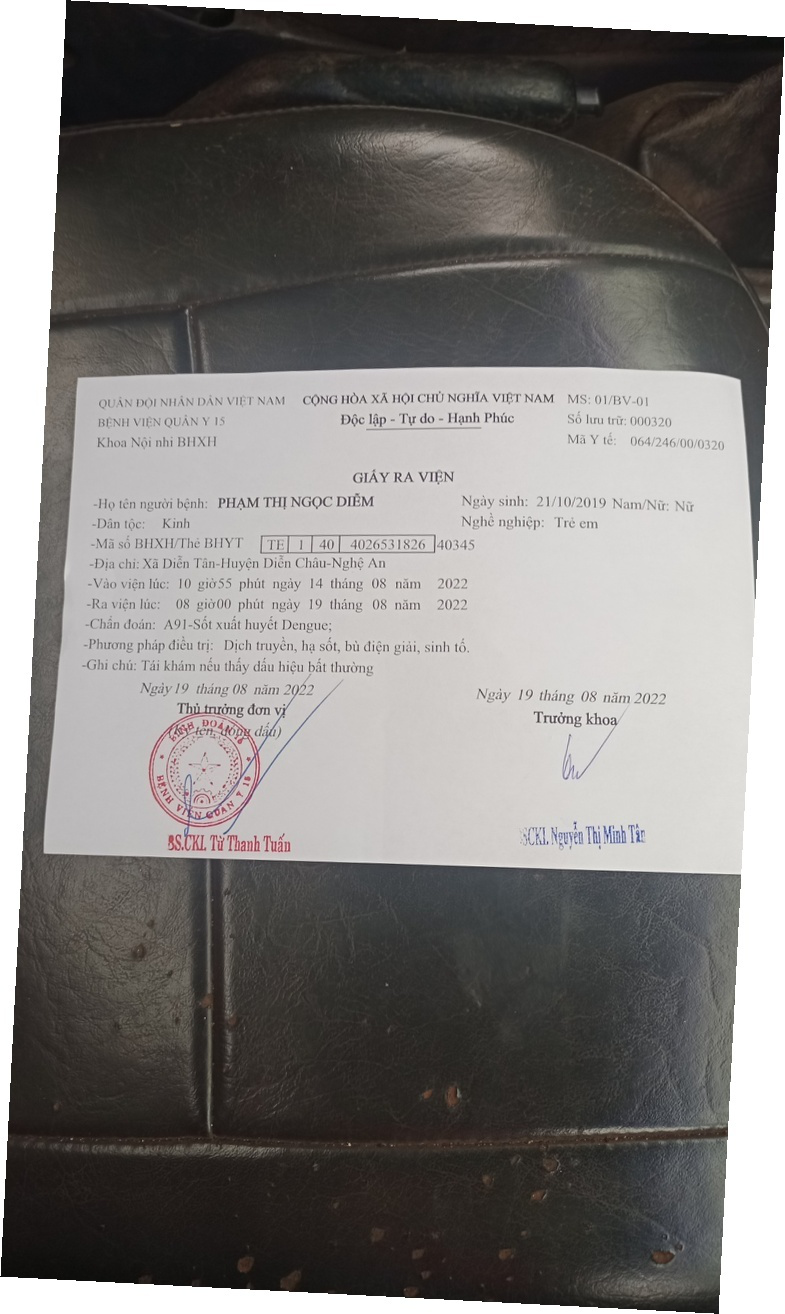

In [56]:
visualize_main_info(kie_df)
from PIL import Image
img = Image.open(r"temp_data\temp_gcn\img\temp.jpg")
display(img)


In [29]:
kie_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,443,88,548,113,Sao lai là 1,None,0.925103,"[(443, 94), (547, 88), (548, 108), (444, 114)]"
1,1,155,142,299,159,QUÂN ĐỘI NHÂN DÂN VIỆT NAM,None,0.679970,"[(155, 143), (299, 142), (299, 159), (155, 160)]"
2,2,351,135,523,154,CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM,None,0.988037,"[(351, 137), (523, 135), (523, 153), (351, 155)]"
3,3,609,130,670,144,Mẫu số: 01/BV-01,None,0.991887,"[(609, 130), (670, 130), (670, 145), (609, 145)]"
4,4,609,136,689,166,Số trung 8097/2021,None,0.802685,"[(609, 144), (686, 136), (689, 158), (611, 167)]"
5,5,155,155,243,168,BỆNH VIỆN QUÂN Y 109,hospital_name,0.988652,"[(155, 155), (243, 155), (243, 169), (155, 169)]"
6,6,391,152,483,163,Độc lập - Tự do - Hạnh phúc,None,0.997882,"[(391, 152), (483, 152), (483, 164), (391, 164)]"
7,7,644,155,676,163,4604104,None,0.971161,"[(644, 155), (676, 155), (676, 164), (644, 164)]"
8,8,161,190,346,220,Họ viện người bệnh: NGUYỄN TRẦN LÂM,patient_name,0.934158,"[(161, 197), (345, 190), (346, 214), (162, 221)]"
9,9,333,177,426,196,GIẤY RA VIỆN,document_type,0.997498,"[(333, 177), (426, 179), (426, 197), (333, 195)]"


In [11]:

for img_idx in range(227, 241):
    try:
        s_time = time.time()
        img_idx = str(img_idx)
        test_img = cv2.imread(f"D:/PPYData/rotated_imgs/{img_idx}.jpeg")
        test_img = preprocessImage(test_img)

        result = lineDetAndOCR.begin_recognize_text(test_img)
        kie_df = kieGCN(result, test_img)
        print("Total processing time:", time.time() - s_time)
        print("--------------------")

        current_annotation = []
        for idx in range(len(kie_df)):
            row = kie_df.iloc[idx]
            transcription = row["Object"]
            polygon = ast.literal_eval(row["polygon"])
            points = [list(each) for each in polygon]
            key_cls = row["pred_label"]
            cur_dict = {
                "transcription":transcription,
                "points":points,
                "difficult":False,
                "key_cls":key_cls
            }
            current_annotation.append(cur_dict)

        cur_line = f"test/{img_idx}.jpeg\t{current_annotation}"
        with open(r"D:\PPYData\test\Label.txt", "a", encoding="utf-8") as f:
            f.writelines(cur_line+"\n")
    except Exception as e:
        print(f"ERROR at {img_idx}")
        print(e)
        print("--------------------")

ERROR at 227
'NoneType' object has no attribute 'copy'
extracted_line time: 0.10579824447631836
ocr_line time: 0.7378075122833252
make graph:  0.17786264419555664
transform:  1.7236053943634033
Total processing time: 3.567331314086914
--------------------
extracted_line time: 0.4144623279571533
ocr_line time: 0.785740852355957
make graph:  0.2165689468383789
transform:  1.95224928855896
Total processing time: 4.530199766159058
--------------------
extracted_line time: 0.11489319801330566
ocr_line time: 0.8853976726531982
make graph:  0.1995227336883545
transform:  1.788086175918579
Total processing time: 3.74703311920166
--------------------
extracted_line time: 0.19411969184875488
ocr_line time: 0.7054686546325684
make graph:  0.1845250129699707
transform:  1.4030554294586182
Total processing time: 3.604762554168701
--------------------
extracted_line time: 0.15250420570373535
ocr_line time: 0.8350620269775391
make graph:  0.19925332069396973
transform:  1.8188855648040771
Total proce

In [136]:
list_diagnose = kie_df[kie_df["pred_label"] == "diagnose"]["Object"].to_list()

In [105]:
list_diagnose

['- Chẩn đoán: A41: Nhiễm trùng khác - (R53) Khó ở và mệt mỏi; (R07.3) Đau ngực khác']

In [106]:
for each in list_diagnose:
    icds = icd_code_parser(each)
    print(icds)

['R07.3', 'A41', 'R53']


In [248]:
s = '- Thường]:K21-Bệnh trảo ng'
pt = '[a-zA-Z]{1}\d+[:\- \])}]'

result = re.findall(pt, s)
result

['K21-']

In [165]:
def parse_date_with_re(raw_date):
    pattern = "\d+[/-]\d+[/-]\d+"
    temp_date = raw_date.replace("\\","/")
    temp_date = re.findall(pattern=pattern, string=temp_date)
    list_result = []
    for each in temp_date:
        for splitter in ["/", "-"]:
            if splitter in each:
                d, m, y = each.split(splitter)
                list_result.append((d,m,y))
                break
    return list_result

In [249]:
def icd_code_parser(raw_diagnose):
    diagnose = raw_diagnose
    first_pattern = '[a-zA-Z]{1}\d+.\d+[:\- \])}]'
    second_pattern = '[a-zA-Z]{1}\d+[:\- \])}]'
    first_result = re.findall(first_pattern, diagnose)
    second_result = re.findall(second_pattern, diagnose)

    total_result = first_result + second_result
    final_result = []
    for each in total_result:
        chars_to_remove = ",.:])-} "
        if each[-1] in chars_to_remove:
            single_icd = each[:-1]
            final_result.append(single_icd)
    return final_result

In [169]:
s = r"Hôm nay là ngày 21\102022"
dmy = parse_date_with_re(s)
dmy

[]

In [270]:
a = 1
b = 2
c = 3
d = a+b
e = d+c
print(d)
print(e)

3
6


In [3]:
import postprocess
import importlib
importlib.reload(postprocess)
kiePostprocess = postprocess.KiePostProcess()

In [2]:
kiePostprocess.append_kie_df(kie_df)

hospital_name = kiePostprocess.hospital_name_postprocess()
print("hospital_name:", hospital_name)

patient_name = kiePostprocess.patient_name_postprocess()
print("patient_name:", patient_name)

age, temp_gender = kiePostprocess.age_postprocess()
gender, temp_age = kiePostprocess.gender_postprocess()
if age == None and temp_age != None:
    age = temp_age
if gender == None and temp_gender != None:
    gender = temp_gender

if age == None:
    age = kiePostprocess.find_age_remain()
print("gender:", gender)
print("age:", age)

admissiion_dates = kiePostprocess.admission_date_postprocess()
for each in admissiion_dates:
    print("admissiion_date:", each)

discharge_dates = kiePostprocess.discharge_date_postprocess()
for each in discharge_dates:
    print("discharge_date:", each)

sign_dates = kiePostprocess.sign_date_postprocess()
for each in sign_dates:
    print("sign_date:", each)


ICD_codes = kiePostprocess.ICD_code_postprocess()
print("ICD_codes:", ICD_codes)

NameError: name 'kie_df' is not defined

In [1]:
import e2e_process
from kie_gcn import InvoiceGCN
from PIL import Image
from IPython.display import display
import cv2

INFO 2022-10-27 16:57:16,797 utils.py:147] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
e2e_OCR_Engine = e2e_process.E2E_OCR_Engine(
    detection_model_path="./PaddleOCR/pretrained_models/exported_det_model_221011",
    text_recognition_model_path="./weights/ocr/ocr_221026.pth",
    gcn_model_path="./weights/./gcn/GCN_221027_best.pth"
)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [11]:
img_path = "D:/PPYData/discharge_paper/11102022/52.jpeg"
# img_path = r"D:/PPYData/image/977.jpeg"
result, extracted_df = e2e_OCR_Engine(img_path)
result

extracted_line time: 0.13247919082641602
ocr_line time: 1.0403423309326172
make graph:  0.20041275024414062
transform:  2.0815322399139404


{'hospital_name': 'BỆNH VIỆN ĐA KHOA CÂM PHẢ',
 'patient_name': 'NGUYỄN THẾ VƯƠNG',
 'age': '35',
 'gender': None,
 'admissiion_date': '20/9/2022',
 'discharge_date': '29/9/2022',
 'sign_date': ['29/9/2022', '29/9/2022', '30/09/2022'],
 'icd-10': []}

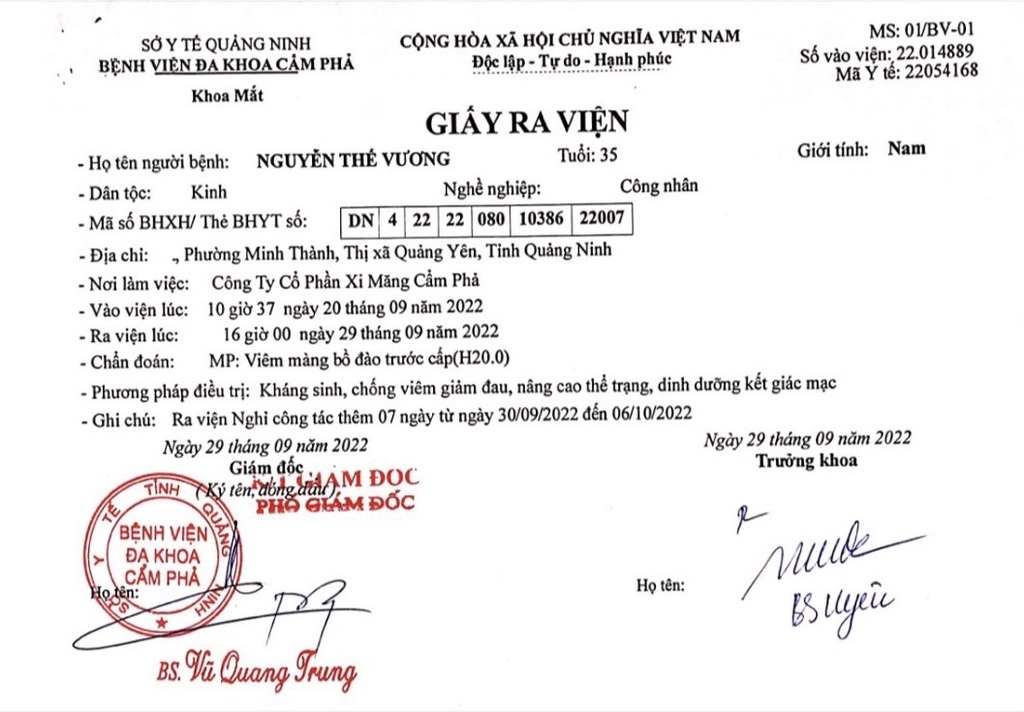

In [12]:
img = cv2.imread(img_path)
display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_RGB2BGR)))

In [13]:
extracted_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,150,36,322,55,SỞ Y TẾ QUẢNG NINH,None,0.979822,"[(150, 36), (322, 36), (322, 56), (150, 56)]"
1,1,410,36,751,55,CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM,None,0.967140,"[(410, 36), (751, 36), (751, 56), (410, 56)]"
2,2,808,53,986,79,Số vào viện: 22.014889,None,0.986850,"[(808, 56), (985, 53), (986, 76), (809, 80)]"
3,3,878,32,985,53,MS: 01/BV-01,None,0.993536,"[(878, 32), (985, 32), (985, 54), (878, 54)]"
4,4,106,55,363,76,BỆNH VIỆN ĐA KHOA CÂM PHẢ,hospital_name,0.978106,"[(106, 55), (363, 55), (363, 77), (106, 77)]"
5,5,481,60,684,79,Độc lập - Tự do - Hạnh phúc,None,0.999014,"[(481, 60), (684, 60), (684, 80), (481, 80)]"
6,6,844,72,989,95,Mã Ý tế: 22054168,None,0.986107,"[(844, 76), (989, 72), (989, 93), (844, 96)]"
7,7,199,88,274,106,Khoa Mắt,department,0.951522,"[(199, 88), (274, 88), (274, 107), (199, 107)]"
8,8,434,112,638,143,GIẤY RA VIỆN,document_type,0.992541,"[(435, 112), (638, 114), (638, 144), (434, 143)]"
9,9,85,153,262,173,- Họ tên người bệnh:,None,0.970851,"[(85, 153), (262, 153), (262, 174), (85, 174)]"


In [16]:
import postprocess
import importlib
import pandas as pd
importlib.reload(postprocess)
x = postprocess.KiePostProcess()

<module 'postprocess' from 'd:\\PPYCode\\OCR\\ppy_paddle\\postprocess.py'>

In [44]:
x.age_regularization("- Năm Sinh: 2020")

('2020', None)

In [24]:
x.icd_code_parser()

[]